# CSE688: Practical and Application of Machine Learning - Spring 2021
## Assignment 3-1
### Authors

- B073040018 朱劭璿
- B072010029 陳居廷

## Create Dataset

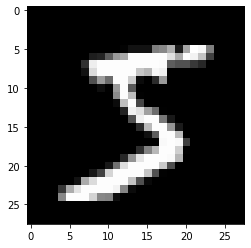

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

ds_train = tf.data.Dataset.from_tensor_slices((train_images, train_images))
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(train_images.shape[0])
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = tf.data.Dataset.from_tensor_slices((test_images, test_images))
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

plt.imshow(train_images[0], cmap='gray')

## Model Design

In [2]:
def encoder(
    h_dim,
    timesteps,
    data_dim,
    out_dim,
    rnn_layer=tf.keras.layers.SimpleRNN
):
    return tf.keras.Sequential([
        tf.keras.layers.Reshape((timesteps, data_dim), input_shape=(timesteps, data_dim, 1)),
        rnn_layer(h_dim, return_sequences=True),
        rnn_layer(h_dim, go_backwards=True),
        tf.keras.layers.Dense(out_dim)
    ])

test = encoder(14, 28, 28, 2)
test.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28)            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 28, 14)            602       
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 14)                406       
_________________________________________________________________
dense (Dense)                (None, 2)                 30        
Total params: 1,038
Trainable params: 1,038
Non-trainable params: 0
_________________________________________________________________


In [3]:
def decoder(
    h_dim,
    timesteps,
    data_dim,
    out_dim,
    rnn_layer=tf.keras.layers.SimpleRNN
):
    return tf.keras.Sequential([
        tf.keras.layers.RepeatVector(timesteps, input_shape=(data_dim,)),
        rnn_layer(h_dim, return_sequences=True),
        rnn_layer(h_dim, return_sequences=True, go_backwards=True),
        tf.keras.layers.Dense(out_dim),
        tf.keras.layers.Reshape((timesteps, out_dim, 1))
    ])

test = decoder(14, 28, 2, 28)
test.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
repeat_vector (RepeatVector) (None, 28, 2)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 28, 14)            238       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 28, 14)            406       
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28)            420       
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 1,064
Trainable params: 1,064
Non-trainable params: 0
_________________________________________________________________


## Simple RNN

In [4]:
rnn_layer = tf.keras.layers.SimpleRNN
model_srnn = tf.keras.Sequential([
    encoder(14, 28, 28, 2, rnn_layer),
    decoder(14, 28, 2, 28, rnn_layer)
])
model_srnn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse'
)

model_srnn.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
469/469 [==============================] - 42s 89ms/step - loss: 0.0751 - val_loss: 0.0655
Epoch 2/20
469/469 [==============================] - 41s 86ms/step - loss: 0.0633 - val_loss: 0.0617
Epoch 3/20
469/469 [==============================] - 41s 88ms/step - loss: 0.0610 - val_loss: 0.0602
Epoch 4/20
469/469 [==============================] - 42s 89ms/step - loss: 0.0599 - val_loss: 0.0595
Epoch 5/20
469/469 [==============================] - 41s 87ms/step - loss: 0.0591 - val_loss: 0.0585
Epoch 6/20
469/469 [==============================] - 41s 87ms/step - loss: 0.0584 - val_loss: 0.0579
Epoch 7/20
469/469 [==============================] - 40s 84ms/step - loss: 0.0577 - val_loss: 0.0572
Epoch 8/20
469/469 [==============================] - 41s 87ms/step - loss: 0.0569 - val_loss: 0.0568
Epoch 9/20
469/469 [==============================] - 41s 88ms/step - loss: 0.0563 - val_loss: 0.0561
Epoch 10/20
469/469 [==============================] - 40s 86ms/step - loss: 0.055

7


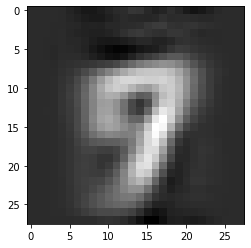

In [5]:
index = 0
gen = model_srnn(tf.expand_dims(test_images[index], axis=0))
print(test_labels[index])
plt.imshow(gen[0], cmap='gray')

## LSTM

In [6]:
rnn_layer = tf.keras.layers.LSTM
model_lstm = tf.keras.Sequential([
    encoder(14, 28, 28, 2, rnn_layer),
    decoder(14, 28, 2, 28, rnn_layer)
])
model_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse'
)

model_lstm.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0671 - val_loss: 0.0597
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0583 - val_loss: 0.0569
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0558 - val_loss: 0.0544
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0536 - val_loss: 0.0524
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0519 - val_loss: 0.0509
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0506 - val_loss: 0.0500
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0495 - val_loss: 0.0488
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0489 - val_loss: 0.0480
Epoch 9/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0482 - val_loss: 0.0483
Epoch 10/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0476 - val_l

7


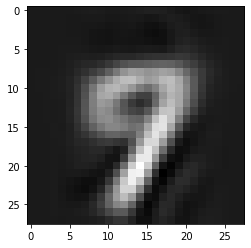

In [7]:
index = 0
gen = model_lstm(tf.expand_dims(test_images[index], axis=0))
print(test_labels[index])
plt.imshow(gen[0], cmap='gray')

## GRU

In [8]:
rnn_layer = tf.keras.layers.GRU
model_gru = tf.keras.Sequential([
    encoder(14, 28, 28, 2, rnn_layer),
    decoder(14, 28, 2, 28, rnn_layer)
])
model_gru.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse'
)

model_gru.fit(
    ds_train,
    epochs=20,
    validation_data=ds_test
)

Epoch 1/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0693 - val_loss: 0.0632
Epoch 2/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0602 - val_loss: 0.0588
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0583 - val_loss: 0.0579
Epoch 4/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0576 - val_loss: 0.0572
Epoch 5/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0570 - val_loss: 0.0564
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0561 - val_loss: 0.0555
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0551 - val_loss: 0.0546
Epoch 8/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0544 - val_loss: 0.0545
Epoch 9/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0538 - val_loss: 0.0533
Epoch 10/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0532 - val_l

7


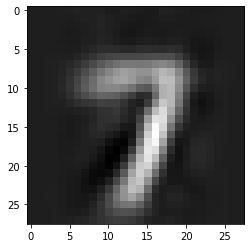

In [22]:
index = 0
gen = model_gru(tf.expand_dims(test_images[index], axis=0))
print(test_labels[index])
plt.imshow(gen[0], cmap='gray')